In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('D:\College work\highradius\H2HBABBA1916.csv')

# Steps TODO
Understanding the problem

Data Reading

Removing the datapoints where the target value is null

Preprocess the data

Train , validation and test split

EDA

Feature Engg

Feture Selection

Modelling

HPT

Accuracy

In [2]:
df_train=df[df['clear_date'].notnull()]
df_test=df[df['clear_date'].isnull()]

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              40000 non-null  int64  
 1   business_code           40000 non-null  object 
 2   cust_number             40000 non-null  object 
 3   name_customer           40000 non-null  object 
 4   clear_date              40000 non-null  object 
 5   buisness_year           40000 non-null  float64
 6   doc_id                  40000 non-null  float64
 7   posting_date            40000 non-null  object 
 8   document_create_date    40000 non-null  int64  
 9   document_create_date.1  40000 non-null  object 
 10  due_in_date             40000 non-null  object 
 11  invoice_currency        40000 non-null  object 
 12  document type           40000 non-null  object 
 13  posting_id              40000 non-null  float64
 14  area_business           0 non-null    

In [4]:

df_train.shape


(40000, 20)

In [6]:
df_test.shape

(10000, 20)

#  Preprocessing

In [5]:
# date time conversion
df_train['due_in_date'] = pd.to_datetime(df_train['due_in_date'])

df_train['baseline_create_date'] = pd.to_datetime(df_train['baseline_create_date'])

In [6]:
df_train['document_create_date.1'] = pd.to_datetime(df_train['document_create_date.1'])

In [7]:
df_train['posting_date'] = pd.to_datetime(df_train['posting_date'])

In [8]:
df_train['clear_date'] = pd.to_datetime(df_train['clear_date'])

In [9]:
#Droping clomn which are either constant or Null
df_train.drop(['isOpen','posting_id','document type','area_business','invoice_currency','document_create_date','buisness_year','Unnamed: 0','business_code'], axis =1,inplace=True)

#sort values by data as the delay is dependent on the posting date 
# we only use past data to train the model , hence sorting ensures that while splittig the data only past data is there on the train set

df_train.sort_values(by=['posting_date'])

,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
3724,0200769623,WAL-MAR corporation,2019-01-10,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,2646.29,2018-12-30,NAH4,1.928543e+09
22075,0200769623,WAL-MAR llc,2019-01-10,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,756.28,2018-12-30,NAH4,1.928543e+09
36984,CCU013,KRAFT F associates,2019-03-01,1.928511e+09,2018-12-30,2018-12-30,2018-12-30,5897.75,2018-12-30,NAX2,1.928511e+09
24851,0200769623,WAL-MAR systems,2019-01-09,1.928540e+09,2018-12-30,2018-12-30,2019-01-14,46142.53,2018-12-30,NAH4,1.928540e+09
31367,0200769623,WAL-MAR systems,2019-01-09,1.928540e+09,2018-12-30,2018-12-30,2019-01-14,25912.52,2018-12-30,NAH4,1.928540e+09
...,...,...,...,...,...,...,...,...,...,...,...
4017,0200777735,NASH us,2020-03-11,1.930578e+09,2020-02-27,2020-02-27,2020-05-02,47259.54,2020-02-27,NAGD,1.930578e+09
48990,0200794332,COST llc,2020-03-12,1.930572e+09,2020-02-27,2020-02-27,2020-03-13,8793.09,2020-02-27,NAAX,1.930572e+09
7601,0200943275,US llc,2020-03-13,1.930581e+09,2020-02-27,2020-02-27,2020-03-13,37837.60,2020-02-27,NAA8,1.930581e+09
9718,0200571849,US associates,2020-03-20,1.930580e+09,2020-02-27,2020-02-27,2020-03-18,4230.72,2020-02-27,NAD1,1.930580e+09


In [10]:
df_train['delay'] = df_train['clear_date'].sub(df_train['due_in_date'], axis=0).dt.days
df_train['target_delay']=df_train['delay']
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   cust_number             40000 non-null  object        
 1   name_customer           40000 non-null  object        
 2   clear_date              40000 non-null  datetime64[ns]
 3   doc_id                  40000 non-null  float64       
 4   posting_date            40000 non-null  datetime64[ns]
 5   document_create_date.1  40000 non-null  datetime64[ns]
 6   due_in_date             40000 non-null  datetime64[ns]
 7   total_open_amount       40000 non-null  float64       
 8   baseline_create_date    40000 non-null  datetime64[ns]
 9   cust_payment_terms      40000 non-null  object        
 10  invoice_id              39991 non-null  float64       
 11  delay                   40000 non-null  int64         
 12  target_delay            40000 non-null  int64 

In [11]:
df_train.drop(['target_delay'], axis =1,inplace=True)
df_train.drop(['clear_date'], axis =1,inplace=True)
#Dropping the record contating null value as the invoice_id is MCAR
df_train[df_train.invoice_id.isnull()]
df_train = df_train[df_train.invoice_id.isnull()==False]
df_train.shape

(39991, 11)

In [12]:
#Split Data
# Converting the main_train into X and y so that we can pass it onto train_test_split function

# X --> contains the dataframe without the target
X = df_train.drop('delay',axis=1)

# y --> contains only the target value 
y = df_train['delay']

In [13]:
#splitting the data first into two part -- doing a 70:30 split i.e 30% data fed to intermediate test data set
from sklearn.model_selection import train_test_split
X_train,X_inter_test,y_train,y_inter_test = train_test_split(X,y,test_size=0.3,random_state=0 , shuffle = False)

In [14]:
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.5,random_state=0 , shuffle = False)

In [15]:
X_train.shape , X_val.shape , X_test.shape

((27993, 10), (5999, 10), (5999, 10))

# EDA

<AxesSubplot:xlabel='delay', ylabel='Density'>

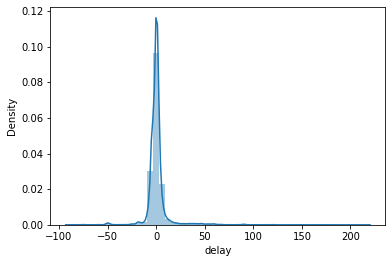

In [16]:


sns.distplot(y_train)

In [17]:
X_train.merge(y_train,on = X_train.index)

,key_0,cust_number,name_customer,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
0,0,0200793830,M llc,1.928808e+09,2019-02-15,2019-02-15,2019-03-02,19226.92,2019-02-15,NAA8,1.928808e+09,2
1,1,0200712105,WALG co,1.928833e+09,2019-02-20,2019-02-20,2019-04-26,3884.54,2019-02-20,NAGD,1.928833e+09,6
2,2,0200762301,C&S WH co,1.928944e+09,2019-03-12,2019-03-12,2019-03-27,11425.64,2019-03-12,NAC6,1.928944e+09,1
3,3,0200762301,C&S WH trust,1.930401e+09,2020-01-16,2020-01-16,2020-01-31,116263.73,2020-01-16,NAC6,1.930401e+09,0
4,4,0200331749,SYSC systems,1.930146e+09,2019-11-15,2019-11-15,2019-11-30,4313.46,2019-11-15,NAA8,1.930146e+09,4
...,...,...,...,...,...,...,...,...,...,...,...,...
27988,34984,0200230690,DECA in,1.930490e+09,2020-02-06,2020-02-06,2020-02-24,11569.86,2020-02-01,NAM4,1.930490e+09,-10
27989,34985,0200707822,PUBLI systems,1.930054e+09,2019-10-26,2019-10-26,2019-11-10,68204.97,2019-10-26,NAA8,1.930054e+09,2
27990,34986,0200780383,MEIJ systems,1.929888e+09,2019-09-19,2019-09-19,2019-10-04,6585.76,2019-09-19,NAA8,1.929888e+09,3
27991,34987,0200769623,WAL-MAR systems,1.928668e+09,2019-01-24,2019-01-24,2019-02-08,2294.06,2019-01-24,NAH4,1.928668e+09,-4


<AxesSubplot:xlabel='delay', ylabel='due_in_date'>

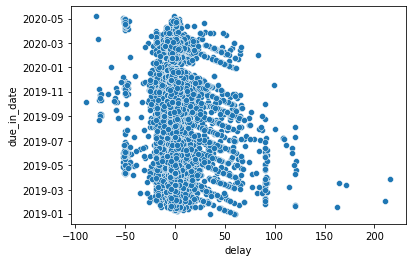

In [18]:
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="delay", y="due_in_date")

# # Feature Engg 

In [19]:

#extract day,month and year 

X_train['due_in_day'] = X_train['due_in_date'].dt.day
X_train['due_in_month'] = X_train['due_in_date'].dt.month
X_train['due_in_year'] = X_train['due_in_date'].dt.year

X_val['due_in_day'] = X_val['due_in_date'].dt.day
X_val['due_in_month'] = X_val['due_in_date'].dt.month
X_val['due_in_year'] = X_val['due_in_date'].dt.year


X_test['due_in_day'] = X_test['due_in_date'].dt.day
X_test['due_in_month'] = X_test['due_in_date'].dt.month
X_test['due_in_year'] = X_test['due_in_date'].dt.year

X_train['baseline_create_in_day'] = X_train['baseline_create_date'].dt.day
X_train['baseline_create_in_month'] = X_train['baseline_create_date'].dt.month
X_train['baseline_create_in_year'] = X_train['baseline_create_date'].dt.year

X_val['baseline_create_in_day'] = X_val['baseline_create_date'].dt.day
X_val['baseline_create_in_month'] = X_val['baseline_create_date'].dt.month
X_val['baseline_create_in_year'] = X_val['baseline_create_date'].dt.year


X_test['baseline_create_in_day'] = X_test['baseline_create_date'].dt.day
X_test['baseline_create_in_month'] = X_test['baseline_create_date'].dt.month
X_test['baseline_create_in_year'] = X_test['baseline_create_date'].dt.year

#X_train['clear_in_day'] = X_train['clear_date'].dt.day
#X_train['clear_in_month'] = X_train['clear_date'].dt.month
#X_train['clear_in_year'] = X_train['clear_date'].dt.year

#X_val['clear_in_day'] = X_val['clear_date'].dt.day
#X_val['clear_in_month'] = X_val['clear_date'].dt.month
#X_val['clear_in_year'] = X_val['clear_date'].dt.year


#X_test['clear_in_day'] = X_test['clear_date'].dt.day
#X_test['clear_in_month'] = X_test['clear_date'].dt.month
#X_test['clear_in_year'] = X_test['clear_date'].dt.year





In [20]:
X_test.head()

,cust_number,name_customer,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,due_in_day,due_in_month,due_in_year,baseline_create_in_day,baseline_create_in_month,baseline_create_in_year
42507,0200353024,DECA corp,1.928588e+09,2019-01-08,2019-01-08,2019-01-08,2438.18,2019-01-01,NAM1,1.928588e+09,8,1,2019,1,1,2019
42509,0200936373,SUPE llc,1.929788e+09,2019-08-23,2019-08-23,2019-09-07,117093.91,2019-08-23,NAA8,1.929788e+09,7,9,2019,23,8,2019
42510,0140106408,WAL-M in,2.960555e+09,2019-06-16,2019-06-16,2019-06-26,7679.93,2019-06-16,CA10,2.960555e+09,26,6,2019,16,6,2019
42511,0200769623,WAL-MAR,1.929817e+09,2019-08-30,2019-08-30,2019-09-14,1259.34,2019-08-30,NAH4,1.929817e+09,14,9,2019,30,8,2019
42512,0200769623,WAL-MAR,1.930090e+09,2019-11-02,2019-11-02,2019-11-17,53428.25,2019-11-02,NAH4,1.930090e+09,17,11,2019,2,11,2019


In [21]:

# by mean encoding
mean_ordinal=X_train.groupby(['name_customer'])['due_in_month'].mean().to_dict()
X_train['name_customer_enc']=X_train['name_customer'].map(mean_ordinal)
val_mean_ordinal=X_val.groupby(['name_customer'])['due_in_month'].mean().to_dict()
X_val['name_customer_enc']=X_val['name_customer'].map(mean_ordinal)
test_mean_ordinal=X_test.groupby(['name_customer'])['due_in_month'].mean().to_dict()
X_test['name_customer_enc']=X_test['name_customer'].map(mean_ordinal)

In [22]:
mean_ordinal=X_train.groupby(['cust_number'])['due_in_month'].mean().to_dict()
X_train['cust_number_enc']=X_train['cust_number'].map(mean_ordinal)
val_mean_ordinal=X_val.groupby(['cust_number'])['due_in_month'].mean().to_dict()
X_val['cust_number_enc']=X_val['cust_number'].map(mean_ordinal)
test_mean_ordinal=X_test.groupby(['cust_number'])['due_in_month'].mean().to_dict()
X_test['cust_number_enc']=X_test['cust_number'].map(mean_ordinal)


In [23]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27993 entries, 0 to 34988
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   cust_number               27993 non-null  object        
 1   name_customer             27993 non-null  object        
 2   doc_id                    27993 non-null  float64       
 3   posting_date              27993 non-null  datetime64[ns]
 4   document_create_date.1    27993 non-null  datetime64[ns]
 5   due_in_date               27993 non-null  datetime64[ns]
 6   total_open_amount         27993 non-null  float64       
 7   baseline_create_date      27993 non-null  datetime64[ns]
 8   cust_payment_terms        27993 non-null  object        
 9   invoice_id                27993 non-null  float64       
 10  due_in_day                27993 non-null  int64         
 11  due_in_month              27993 non-null  int64         
 12  due_in_year       

In [24]:


mean_ordinal=X_train.groupby(['cust_payment_terms'])['due_in_month'].mean().to_dict()
X_train['cust_payment_terms_enc']=X_train['cust_payment_terms'].map(mean_ordinal)
val_mean_ordinal=X_val.groupby(['cust_payment_terms'])['due_in_month'].mean().to_dict()
X_val['cust_payment_terms_enc']=X_val['cust_payment_terms'].map(mean_ordinal)
test_mean_ordinal=X_test.groupby(['cust_payment_terms'])['due_in_month'].mean().to_dict()
X_test['cust_payment_terms_enc']=X_test['cust_payment_terms'].map(mean_ordinal)

In [25]:
X_test.head()

,cust_number,name_customer,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,due_in_day,due_in_month,due_in_year,baseline_create_in_day,baseline_create_in_month,baseline_create_in_year,name_customer_enc,cust_number_enc,cust_payment_terms_enc
42507,0200353024,DECA corp,1.928588e+09,2019-01-08,2019-01-08,2019-01-08,2438.18,2019-01-01,NAM1,1.928588e+09,8,1,2019,1,1,2019,6.622642,6.324607,6.233766
42509,0200936373,SUPE llc,1.929788e+09,2019-08-23,2019-08-23,2019-09-07,117093.91,2019-08-23,NAA8,1.929788e+09,7,9,2019,23,8,2019,6.756098,6.968421,6.095336
42510,0140106408,WAL-M in,2.960555e+09,2019-06-16,2019-06-16,2019-06-26,7679.93,2019-06-16,CA10,2.960555e+09,26,6,2019,16,6,2019,6.281250,6.169279,6.195212
42511,0200769623,WAL-MAR,1.929817e+09,2019-08-30,2019-08-30,2019-09-14,1259.34,2019-08-30,NAH4,1.929817e+09,14,9,2019,30,8,2019,5.929032,6.155028,6.117223
42512,0200769623,WAL-MAR,1.930090e+09,2019-11-02,2019-11-02,2019-11-17,53428.25,2019-11-02,NAH4,1.930090e+09,17,11,2019,2,11,2019,5.929032,6.155028,6.117223


In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27993 entries, 0 to 34988
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   cust_number               27993 non-null  object        
 1   name_customer             27993 non-null  object        
 2   doc_id                    27993 non-null  float64       
 3   posting_date              27993 non-null  datetime64[ns]
 4   document_create_date.1    27993 non-null  datetime64[ns]
 5   due_in_date               27993 non-null  datetime64[ns]
 6   total_open_amount         27993 non-null  float64       
 7   baseline_create_date      27993 non-null  datetime64[ns]
 8   cust_payment_terms        27993 non-null  object        
 9   invoice_id                27993 non-null  float64       
 10  due_in_day                27993 non-null  int64         
 11  due_in_month              27993 non-null  int64         
 12  due_in_year       

In [27]:
# function will delete a column from train , val and test
def thanos_snap(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

In [28]:
X_train ,X_val, X_test = thanos_snap(['doc_id'])

In [29]:
X_train.shape

(27993, 18)

In [30]:
X_train.head()

,cust_number,name_customer,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,due_in_day,due_in_month,due_in_year,baseline_create_in_day,baseline_create_in_month,baseline_create_in_year,name_customer_enc,cust_number_enc,cust_payment_terms_enc
0,0200793830,M llc,2019-02-15,2019-02-15,2019-03-02,19226.92,2019-02-15,NAA8,1.928808e+09,2,3,2019,15,2,2019,5.000000,6.388889,6.095336
1,0200712105,WALG co,2019-02-20,2019-02-20,2019-04-26,3884.54,2019-02-20,NAGD,1.928833e+09,26,4,2019,20,2,2019,5.090909,6.323077,6.135135
2,0200762301,C&S WH co,2019-03-12,2019-03-12,2019-03-27,11425.64,2019-03-12,NAC6,1.928944e+09,27,3,2019,12,3,2019,6.516854,6.255373,6.156667
3,0200762301,C&S WH trust,2020-01-16,2020-01-16,2020-01-31,116263.73,2020-01-16,NAC6,1.930401e+09,31,1,2020,16,1,2020,6.159420,6.255373,6.156667
4,0200331749,SYSC systems,2019-11-15,2019-11-15,2019-11-30,4313.46,2019-11-15,NAA8,1.930146e+09,30,11,2019,15,11,2019,6.235294,6.756098,6.095336


In [31]:
X_train ,X_val, X_test = thanos_snap(['name_customer'])

In [32]:
X_train ,X_val, X_test = thanos_snap(['cust_number'])

In [33]:
X_train ,X_val, X_test = thanos_snap(['posting_date'])

In [34]:
X_train ,X_val, X_test = thanos_snap(['document_create_date.1'])

In [35]:
X_train ,X_val, X_test = thanos_snap(['cust_payment_terms'])

In [36]:
X_train.head(10)

,due_in_date,total_open_amount,baseline_create_date,invoice_id,due_in_day,due_in_month,due_in_year,baseline_create_in_day,baseline_create_in_month,baseline_create_in_year,name_customer_enc,cust_number_enc,cust_payment_terms_enc
0,2019-03-02,19226.92,2019-02-15,1.928808e+09,2,3,2019,15,2,2019,5.000000,6.388889,6.095336
1,2019-04-26,3884.54,2019-02-20,1.928833e+09,26,4,2019,20,2,2019,5.090909,6.323077,6.135135
2,2019-03-27,11425.64,2019-03-12,1.928944e+09,27,3,2019,12,3,2019,6.516854,6.255373,6.156667
3,2020-01-31,116263.73,2020-01-16,1.930401e+09,31,1,2020,16,1,2020,6.159420,6.255373,6.156667
4,2019-11-30,4313.46,2019-11-15,1.930146e+09,30,11,2019,15,11,2019,6.235294,6.756098,6.095336
5,2019-09-10,8192.69,2019-08-26,1.929793e+09,10,9,2019,26,8,2019,6.454545,6.246032,6.095336
6,2019-06-04,14933.86,2019-05-20,1.929348e+09,4,6,2019,20,5,2019,6.129032,6.155028,6.117223
7,2019-07-12,3748.84,2019-06-27,1.929550e+09,12,7,2019,27,6,2019,6.160126,6.155028,6.117223
9,2019-11-01,3100.56,2019-10-17,1.930020e+09,1,11,2019,17,10,2019,7.439024,6.518987,6.095336
11,2019-04-04,12842.58,2019-03-20,1.928990e+09,4,4,2019,20,3,2019,6.306425,6.155028,6.117223


In [37]:
X_train ,X_val, X_test = thanos_snap(['due_in_date'])

In [38]:
X_train ,X_val, X_test = thanos_snap(['baseline_create_date'])

In [39]:
X_val[X_val.name_customer_enc.isnull()]


,total_open_amount,invoice_id,due_in_day,due_in_month,due_in_year,baseline_create_in_day,baseline_create_in_month,baseline_create_in_year,name_customer_enc,cust_number_enc,cust_payment_terms_enc
34996,15659.67,2.960526e+09,11,2,2019,1,2,2019,NaN,5.000000,6.195212
35015,47634.27,1.928942e+09,27,3,2019,12,3,2019,NaN,7.416667,6.095336
35028,29016.99,1.990571e+09,4,3,2020,29,1,2020,NaN,6.666667,6.262681
35040,29055.59,1.990565e+09,12,3,2019,5,2,2019,NaN,7.150000,6.262681
35047,286.94,1.929094e+09,20,4,2019,5,4,2019,NaN,NaN,6.095336
...,...,...,...,...,...,...,...,...,...,...,...
42360,4005.76,1.929748e+09,5,9,2019,21,8,2019,NaN,5.333333,6.095336
42382,37412.56,1.991827e+09,21,6,2019,22,4,2019,NaN,8.000000,6.944444
42390,66396.43,1.928660e+09,6,2,2019,22,1,2019,NaN,6.166667,6.095336
42428,17157.25,1.930359e+09,25,1,2020,10,1,2020,NaN,11.000000,6.095336


# Feature Selection

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

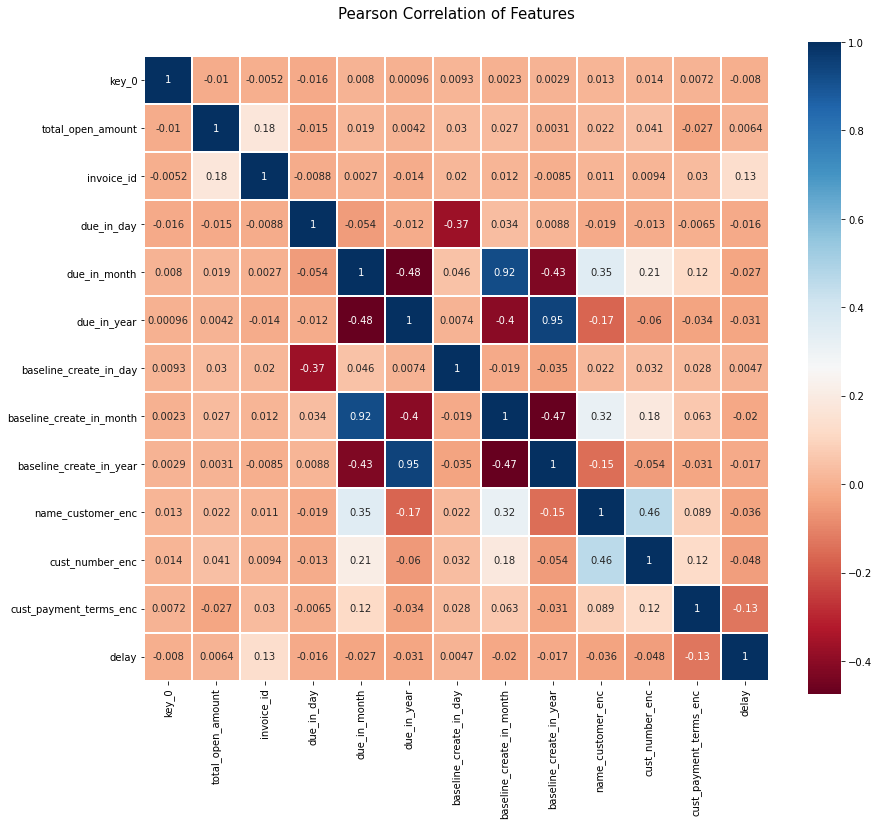

In [41]:


#corrmat = X_train.merge(y_train , on = X_train.index).corr()
# plt.subplots(figsize=(12,9))
# sns.heatmap(corrmat, vmax=0.9, square=True)


colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [42]:
# also since all the columns have been converted to int/ float , you can use variance threshold -- ;-D
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [43]:
sel.variances_

array([1.59526737e+09, 7.77993462e+16, 7.61898571e+01, 1.20921229e+01,
       1.16805296e-01, 7.84560521e+01, 1.22088090e+01, 1.14072435e-01,
       1.48244594e+00, 5.16837003e-01, 1.64428013e-01])

In [44]:
X_train.isnull().mean()

total_open_amount           0.0
invoice_id                  0.0
due_in_day                  0.0
due_in_month                0.0
due_in_year                 0.0
baseline_create_in_day      0.0
baseline_create_in_month    0.0
baseline_create_in_year     0.0
name_customer_enc           0.0
cust_number_enc             0.0
cust_payment_terms_enc      0.0
dtype: float64

In [45]:
## as the missing values are of MCAR form
X_val.isnull().mean()

total_open_amount           0.000000
invoice_id                  0.000000
due_in_day                  0.000000
due_in_month                0.000000
due_in_year                 0.000000
baseline_create_in_day      0.000000
baseline_create_in_month    0.000000
baseline_create_in_year     0.000000
name_customer_enc           0.052675
cust_number_enc             0.013669
cust_payment_terms_enc      0.000333
dtype: float64

In [46]:
#this function removes null values from test,train,val
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
median=X_val.name_customer_enc.median()
median

6.129032258064516

In [47]:
## as the missing values are of MCAR form 

impute_nan(X_val,"name_customer_enc",median)

In [48]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5999 entries, 34989 to 42506
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   total_open_amount         5999 non-null   float64
 1   invoice_id                5999 non-null   float64
 2   due_in_day                5999 non-null   int64  
 3   due_in_month              5999 non-null   int64  
 4   due_in_year               5999 non-null   int64  
 5   baseline_create_in_day    5999 non-null   int64  
 6   baseline_create_in_month  5999 non-null   int64  
 7   baseline_create_in_year   5999 non-null   int64  
 8   name_customer_enc         5683 non-null   float64
 9   cust_number_enc           5917 non-null   float64
 10  cust_payment_terms_enc    5997 non-null   float64
 11  name_customer_enc_median  5999 non-null   float64
dtypes: float64(6), int64(6)
memory usage: 609.3 KB


In [49]:
print(X_val['name_customer_enc'].std())
print(X_val['name_customer_enc_median'].std())

1.1236221787841212
1.093624382359209


In [50]:

impute_nan(X_val,"cust_number_enc",median)

In [51]:
impute_nan(X_val,"cust_payment_terms_enc",median)

In [52]:
impute_nan(X_test,"name_customer_enc",median)
impute_nan(X_test,"cust_number_enc",median)
impute_nan(X_test,"cust_payment_terms_enc",median)

In [53]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5999 entries, 34989 to 42506
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   total_open_amount              5999 non-null   float64
 1   invoice_id                     5999 non-null   float64
 2   due_in_day                     5999 non-null   int64  
 3   due_in_month                   5999 non-null   int64  
 4   due_in_year                    5999 non-null   int64  
 5   baseline_create_in_day         5999 non-null   int64  
 6   baseline_create_in_month       5999 non-null   int64  
 7   baseline_create_in_year        5999 non-null   int64  
 8   name_customer_enc              5683 non-null   float64
 9   cust_number_enc                5917 non-null   float64
 10  cust_payment_terms_enc         5997 non-null   float64
 11  name_customer_enc_median       5999 non-null   float64
 12  cust_number_enc_median         5999 non-nul

In [54]:
X_val.drop(['cust_number_enc'], axis =1,inplace=True)


In [55]:
X_val.drop(['name_customer_enc'], axis =1,inplace=True)
X_val.drop(['cust_payment_terms_enc'], axis =1,inplace=True)

In [56]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5999 entries, 34989 to 42506
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   total_open_amount              5999 non-null   float64
 1   invoice_id                     5999 non-null   float64
 2   due_in_day                     5999 non-null   int64  
 3   due_in_month                   5999 non-null   int64  
 4   due_in_year                    5999 non-null   int64  
 5   baseline_create_in_day         5999 non-null   int64  
 6   baseline_create_in_month       5999 non-null   int64  
 7   baseline_create_in_year        5999 non-null   int64  
 8   name_customer_enc_median       5999 non-null   float64
 9   cust_number_enc_median         5999 non-null   float64
 10  cust_payment_terms_enc_median  5999 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 562.4 KB


In [57]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5999 entries, 42507 to 49999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   total_open_amount              5999 non-null   float64
 1   invoice_id                     5999 non-null   float64
 2   due_in_day                     5999 non-null   int64  
 3   due_in_month                   5999 non-null   int64  
 4   due_in_year                    5999 non-null   int64  
 5   baseline_create_in_day         5999 non-null   int64  
 6   baseline_create_in_month       5999 non-null   int64  
 7   baseline_create_in_year        5999 non-null   int64  
 8   name_customer_enc              5686 non-null   float64
 9   cust_number_enc                5927 non-null   float64
 10  cust_payment_terms_enc         5998 non-null   float64
 11  name_customer_enc_median       5999 non-null   float64
 12  cust_number_enc_median         5999 non-nul

In [58]:
X_test.drop(['cust_number_enc'], axis =1,inplace=True)
X_test.drop(['cust_payment_terms_enc'], axis =1,inplace=True)
X_test.drop(['name_customer_enc'], axis =1,inplace=True)


# Modelling

In [59]:
# first used linear regressor to get basic value
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(X_train, y_train)


LinearRegression()

In [60]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5999 entries, 34989 to 42506
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   total_open_amount              5999 non-null   float64
 1   invoice_id                     5999 non-null   float64
 2   due_in_day                     5999 non-null   int64  
 3   due_in_month                   5999 non-null   int64  
 4   due_in_year                    5999 non-null   int64  
 5   baseline_create_in_day         5999 non-null   int64  
 6   baseline_create_in_month       5999 non-null   int64  
 7   baseline_create_in_year        5999 non-null   int64  
 8   name_customer_enc_median       5999 non-null   float64
 9   cust_number_enc_median         5999 non-null   float64
 10  cust_payment_terms_enc_median  5999 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 562.4 KB


In [61]:
y_predict = base_model.predict(X_val)

In [62]:
#As MSE value is 10.59 
from sklearn.metrics import mean_squared_error

mean_squared_error(y_val, y_predict, squared=False)

10.592524836458015

In [63]:
met = pd.DataFrame(zip(y_predict , y_test),columns=['Predicted','Actuals'])

In [64]:
(abs(met.Predicted-met.Actuals)/met.Actuals).mean()

inf

In [65]:
#Using DecisionTreeRegressor to check for better MSE values
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=5)

In [66]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [67]:
y_predict2 = regressor.predict(X_val)

In [68]:
mean_squared_error(y_val, y_predict2, squared=False)

8.518475557579306

In [69]:
y_predict_test = regressor.predict(X_test)
mean_squared_error(y_test, y_predict_test, squared=False)

9.037921549594946

In [70]:
# finallly using RandomForestRegressor and this will be the algo we will use for prediction
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [71]:
y_pred = reg_rf.predict(X_test)

In [72]:

reg_rf.score(X_train, y_train)
MSE=mean_squared_error(y_test, y_predict_test, squared=False)

In [73]:

reg_rf.score(X_test, y_test)

0.4706552977442594

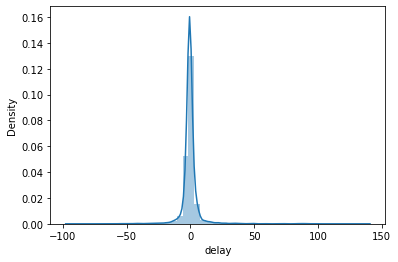

In [74]:
# By displot we can see it is gussian 
sns.distplot(y_test-y_pred)
plt.show()


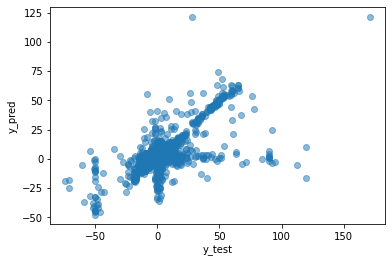

In [75]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [76]:
X_test['pred_delay']=y_pred
X_test['actuals']=y_test

In [77]:
#this is the rmse for Random forest regressor
import math
RMSE = math.sqrt(MSE)
print(RMSE)

3.0063136146441787


In [79]:
 X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5999 entries, 42507 to 49999
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   total_open_amount              5999 non-null   float64
 1   invoice_id                     5999 non-null   float64
 2   due_in_day                     5999 non-null   int64  
 3   due_in_month                   5999 non-null   int64  
 4   due_in_year                    5999 non-null   int64  
 5   baseline_create_in_day         5999 non-null   int64  
 6   baseline_create_in_month       5999 non-null   int64  
 7   baseline_create_in_year        5999 non-null   int64  
 8   name_customer_enc_median       5999 non-null   float64
 9   cust_number_enc_median         5999 non-null   float64
 10  cust_payment_terms_enc_median  5999 non-null   float64
 11  pred_delay                     5999 non-null   float64
 12  actuals                        5999 non-nul

# The Test Set

In [83]:

# preprocessing
df_test.isna().sum()

Unnamed: 0                    0
business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             10000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
dtype: int64

why no EDA ? -- Becz EDA is done only on the train set

In [80]:
#since area of area_business and clear_date are null
X_main_test = df_test.drop(['clear_date'],axis=1)

df_test.drop(['clear_date'], inplace =True,axis=1)
df_test.drop(['area_business'], inplace =True,axis=1)

In [81]:
X_main_test.head()

,Unnamed: 0,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
8,8,U001,0200712836,WINKLE corporation,2020.0,1.930834e+09,2020-04-29,20200428,2020-04-29,2020-05-14,USD,RV,1.0,NaN,33699.30,2020-04-29,NAA8,1.930834e+09,1
10,10,U001,0200725421,BEN foundation,2020.0,1.930647e+09,2020-03-13,20200313,2020-03-13,2020-03-28,USD,RV,1.0,NaN,31702.31,2020-03-13,NAA8,1.930647e+09,1
31,31,U001,0200762301,C&S WH corp,2020.0,1.930768e+09,2020-04-09,20200408,2020-04-09,2020-04-24,USD,RV,1.0,NaN,36655.20,2020-04-09,NAC6,1.930768e+09,1
38,38,U001,0200769623,WAL-MAR us,2020.0,1.930716e+09,2020-03-29,20200328,2020-03-29,2020-04-13,USD,RV,1.0,NaN,36766.13,2020-03-29,NAH4,1.930716e+09,1
43,43,U001,0200076137,OLLIE foundation,2020.0,1.930594e+09,2020-03-04,20200303,2020-03-04,2020-03-19,USD,RV,1.0,NaN,18298.30,2020-03-04,NAA8,1.930594e+09,1


In [82]:
#X_df_test.drop([''], inplace =True,axis=1)
X_main_test['baseline_create_date'] = pd.to_datetime(X_main_test['baseline_create_date'])
X_main_test['due_in_date'] = pd.to_datetime(X_main_test['due_in_date'])

In [83]:
due_in_date=X_main_test['due_in_date']
X_main_test['due_in_day'] = X_main_test['due_in_date'].dt.day
X_main_test['due_in_month'] = X_main_test['due_in_date'].dt.month
X_main_test['due_in_year'] = X_main_test['due_in_date'].dt.year


X_main_test['baseline_create_in_day'] = X_main_test['baseline_create_date'].dt.day
X_main_test['baseline_create_in_month'] = X_main_test['baseline_create_date'].dt.month
X_main_test['baseline_create_in_year'] = X_main_test['baseline_create_date'].dt.year

In [84]:
mean_ordinal=X_main_test.groupby(['name_customer'])['due_in_month'].mean().to_dict()
X_main_test['name_customer_enc']=X_main_test['name_customer'].map(mean_ordinal)

mean_ordinal=X_main_test.groupby(['cust_number'])['due_in_month'].mean().to_dict()
X_main_test['cust_number_enc']=X_main_test['cust_number'].map(mean_ordinal)

mean_ordinal=X_main_test.groupby(['cust_payment_terms'])['due_in_month'].mean().to_dict()
X_main_test['cust_payment_terms_enc']=X_main_test['cust_payment_terms'].map(mean_ordinal)


In [85]:
X_main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 8 to 49995
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                10000 non-null  int64         
 1   business_code             10000 non-null  object        
 2   cust_number               10000 non-null  object        
 3   name_customer             10000 non-null  object        
 4   buisness_year             10000 non-null  float64       
 5   doc_id                    10000 non-null  float64       
 6   posting_date              10000 non-null  object        
 7   document_create_date      10000 non-null  int64         
 8   document_create_date.1    10000 non-null  object        
 9   due_in_date               10000 non-null  datetime64[ns]
 10  invoice_currency          10000 non-null  object        
 11  document type             10000 non-null  object        
 12  posting_id        

In [86]:
X_main_test.drop(['cust_payment_terms','baseline_create_date','posting_id','document type','invoice_currency','due_in_date','document_create_date.1','document_create_date','posting_date','doc_id','buisness_year','name_customer','cust_number','business_code','Unnamed: 0'], inplace =True,axis=1)

In [87]:
X_main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 8 to 49995
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   area_business             0 non-null      float64
 1   total_open_amount         10000 non-null  float64
 2   invoice_id                10000 non-null  float64
 3   isOpen                    10000 non-null  int64  
 4   due_in_day                10000 non-null  int64  
 5   due_in_month              10000 non-null  int64  
 6   due_in_year               10000 non-null  int64  
 7   baseline_create_in_day    10000 non-null  int64  
 8   baseline_create_in_month  10000 non-null  int64  
 9   baseline_create_in_year   10000 non-null  int64  
 10  name_customer_enc         10000 non-null  float64
 11  cust_number_enc           10000 non-null  float64
 12  cust_payment_terms_enc    10000 non-null  float64
dtypes: float64(6), int64(7)
memory usage: 1.1 MB


In [88]:
X_main_test.drop(['isOpen'], inplace =True,axis=1)


In [89]:
X_main_test.drop(['area_business'], inplace =True,axis=1)
predicted_delay=reg_rf.predict(X_main_test)

In [90]:
X_main_test['predicted_delay']=predicted_delay

In [91]:
X_main_test.head()

,total_open_amount,invoice_id,due_in_day,due_in_month,due_in_year,baseline_create_in_day,baseline_create_in_month,baseline_create_in_year,name_customer_enc,cust_number_enc,cust_payment_terms_enc,predicted_delay
8,33699.30,1.930834e+09,14,5,2020,29,4,2020,5.000000,4.600000,4.050096,2.55
10,31702.31,1.930647e+09,28,3,2020,13,3,2020,3.000000,3.500000,4.050096,1.58
31,36655.20,1.930768e+09,24,4,2020,9,4,2020,4.444444,4.291878,4.135514,3.65
38,36766.13,1.930716e+09,13,4,2020,29,3,2020,4.120833,4.049114,4.077422,4.82
43,18298.30,1.930594e+09,19,3,2020,4,3,2020,3.000000,3.625000,4.050096,2.89


In [92]:
day=X_main_test['due_in_day']+X_main_test['predicted_delay'].astype(int)
month=X_main_test['due_in_month']
year=X_main_test['due_in_year']


# resetting the index of main test so that we can merge price series with it
df_test.reset_index(drop=True,inplace=True)

In [93]:
predicted_delay = pd.Series(predicted_delay,name='predicted_delay')

In [94]:
Final = df_test.merge(predicted_delay , on = X_main_test.index )
Final.head() 

,key_0,Unnamed: 0,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,predicted_delay
0,8,8,U001,0200712836,WINKLE corporation,2020.0,1.930834e+09,2020-04-29,20200428,2020-04-29,2020-05-14,USD,RV,1.0,33699.30,2020-04-29,NAA8,1.930834e+09,1,2.55
1,10,10,U001,0200725421,BEN foundation,2020.0,1.930647e+09,2020-03-13,20200313,2020-03-13,2020-03-28,USD,RV,1.0,31702.31,2020-03-13,NAA8,1.930647e+09,1,1.58
2,31,31,U001,0200762301,C&S WH corp,2020.0,1.930768e+09,2020-04-09,20200408,2020-04-09,2020-04-24,USD,RV,1.0,36655.20,2020-04-09,NAC6,1.930768e+09,1,3.65
3,38,38,U001,0200769623,WAL-MAR us,2020.0,1.930716e+09,2020-03-29,20200328,2020-03-29,2020-04-13,USD,RV,1.0,36766.13,2020-03-29,NAH4,1.930716e+09,1,4.82
4,43,43,U001,0200076137,OLLIE foundation,2020.0,1.930594e+09,2020-03-04,20200303,2020-03-04,2020-03-19,USD,RV,1.0,18298.30,2020-03-04,NAA8,1.930594e+09,1,2.89


In [99]:
Final['predicted_delay'].astype(int)

    

0        2
1        2
2        3
3        3
4        3
        ..
9995    11
9996     4
9997     4
9998     8
9999     3
Name: predicted_delay, Length: 10000, dtype: int32

In [97]:

#define bin as0 to 10 ,10 to 20 , 20 to 30 etc
bin=[-100,0,10,20,30,40,50,60,70,80,90,100,110]

In [98]:
Group_days=['< 0 day','0-10 days','10-20 days','20-30 days','30-40 days','40-50 days','50-60 days','60-70 days','70-80 days','80-90 days','90-100 days','>100 days']

In [99]:
Final['Aging_bucket']=pd.cut(Final['predicted_delay'], bin, labels=Group_days)

In [100]:
Final.drop(['Unnamed: 0'], inplace =True,axis=1)
Final.head()

,key_0,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,predicted_delay,Aging_bucket
0,8,U001,0200712836,WINKLE corporation,2020.0,1.930834e+09,2020-04-29,20200428,2020-04-29,2020-05-14,USD,RV,1.0,33699.30,2020-04-29,NAA8,1.930834e+09,1,2.55,0-10 days
1,10,U001,0200725421,BEN foundation,2020.0,1.930647e+09,2020-03-13,20200313,2020-03-13,2020-03-28,USD,RV,1.0,31702.31,2020-03-13,NAA8,1.930647e+09,1,1.58,0-10 days
2,31,U001,0200762301,C&S WH corp,2020.0,1.930768e+09,2020-04-09,20200408,2020-04-09,2020-04-24,USD,RV,1.0,36655.20,2020-04-09,NAC6,1.930768e+09,1,3.65,0-10 days
3,38,U001,0200769623,WAL-MAR us,2020.0,1.930716e+09,2020-03-29,20200328,2020-03-29,2020-04-13,USD,RV,1.0,36766.13,2020-03-29,NAH4,1.930716e+09,1,4.82,0-10 days
4,43,U001,0200076137,OLLIE foundation,2020.0,1.930594e+09,2020-03-04,20200303,2020-03-04,2020-03-19,USD,RV,1.0,18298.30,2020-03-04,NAA8,1.930594e+09,1,2.89,0-10 days


# This is the predicted delay date on test set